In [18]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

%matplotlib inline

In [20]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation
plt.rcParams['figure.figsize'] = (16,8)

In [21]:
data = pd.read_csv('/content/drive/MyDrive/data/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


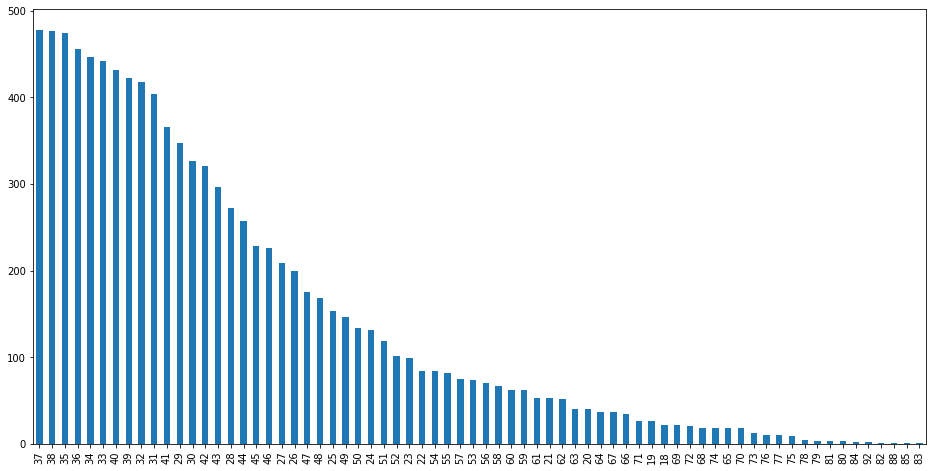

In [24]:
data['Age'].value_counts().head(10000).plot.bar()

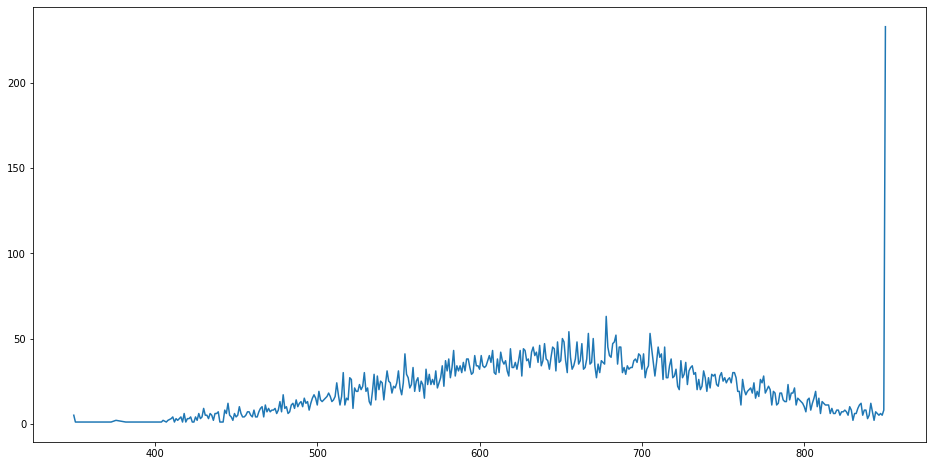

In [25]:
data['CreditScore'].value_counts().sort_index().plot.line()

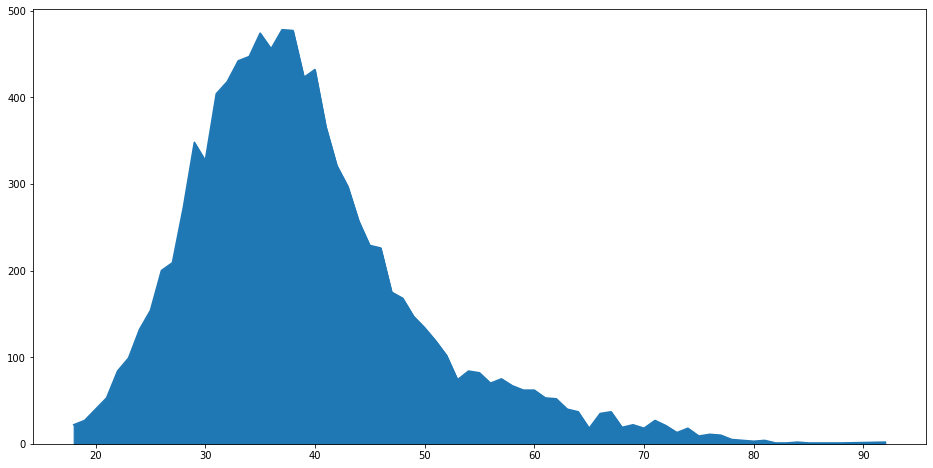

In [26]:
data['Age'].value_counts().sort_index().plot.area()

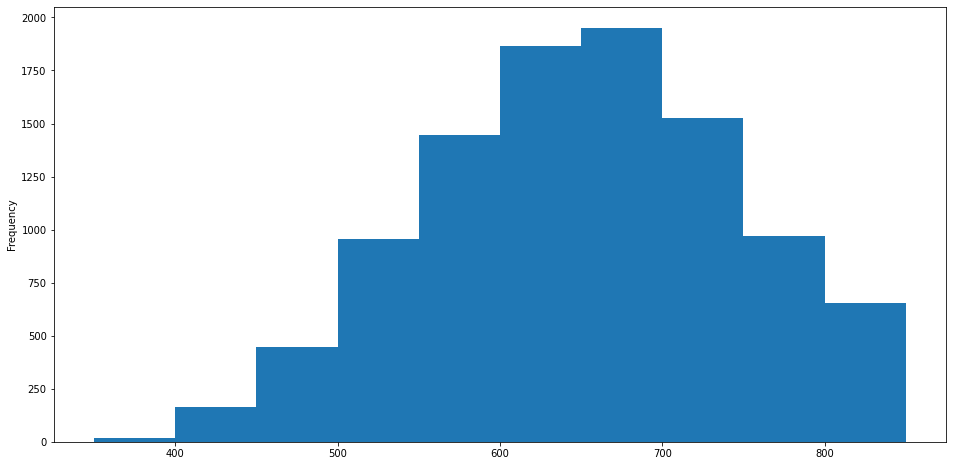

In [27]:
data['CreditScore'].plot.hist()

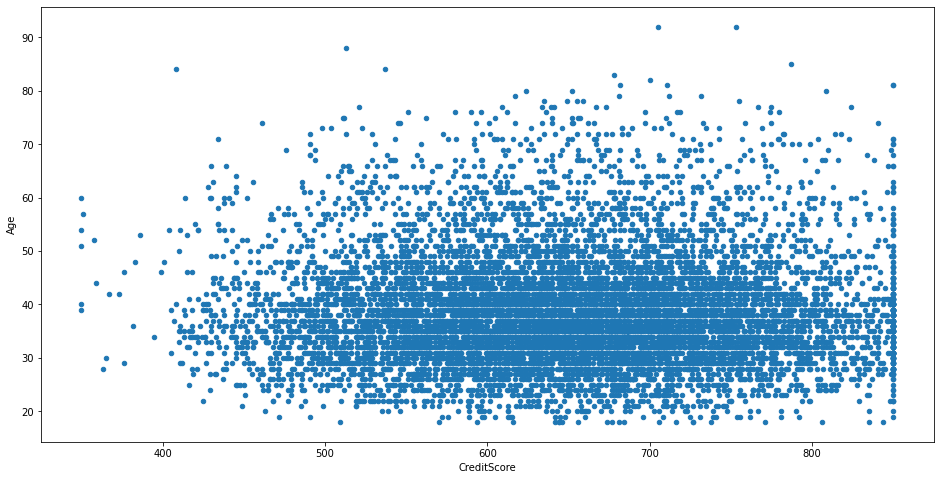

In [28]:

data[data['CreditScore']<100000].plot.scatter(x='CreditScore', y='Age')

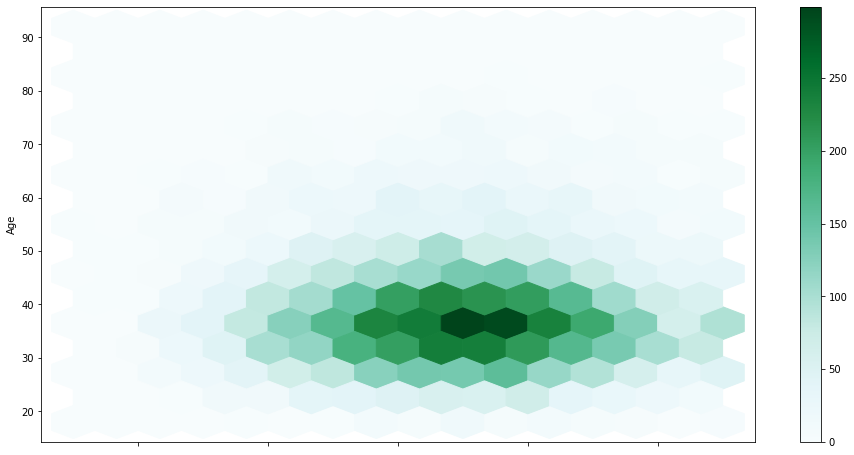

In [29]:
data[data['CreditScore']<100000].plot.hexbin(x='CreditScore', y='Age',gridsize=15)

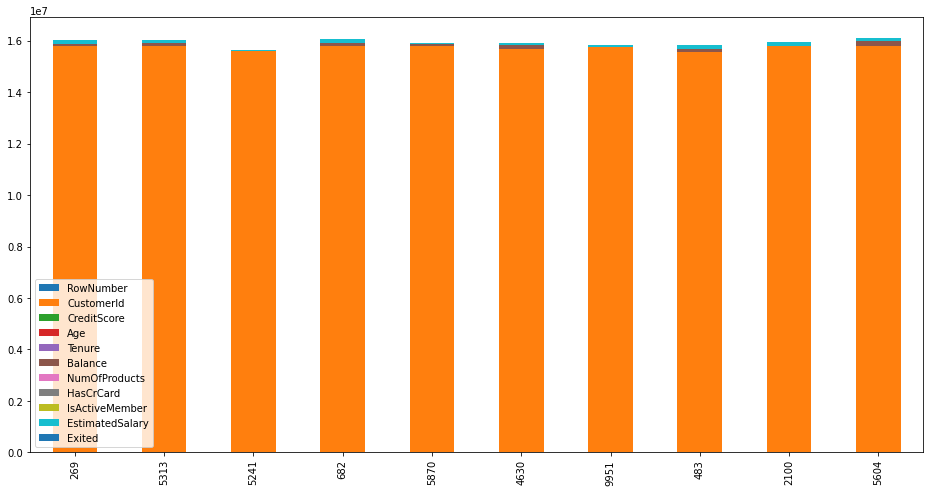

In [30]:
data.sample(10).plot.bar(stacked=True)

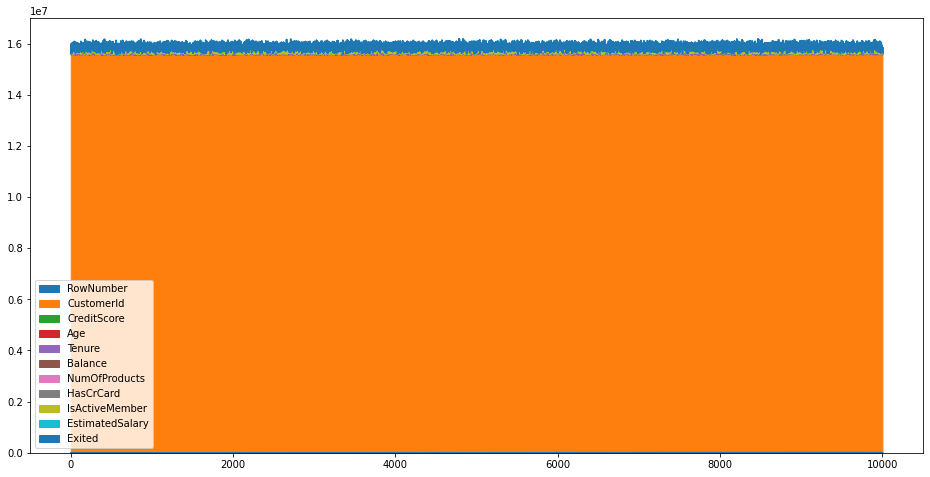

In [31]:
data.plot.area()

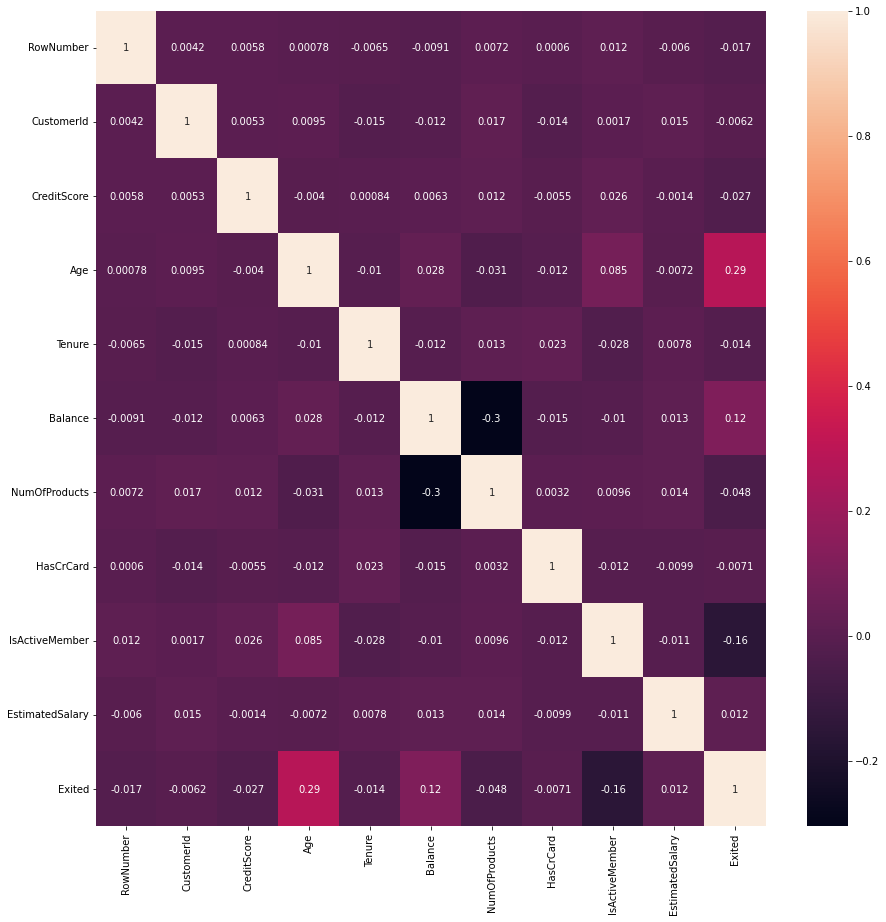

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)

In [33]:
data.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [34]:
def num_cat_features(df):
    num_cols = []
    cat_cols = []
    s= df.dtypes
    for i in s.index:
        if (s[i] == 'int64' or s[i] == 'float64'):
            num_cols.append(i)
        elif s[i]== 'object':
            cat_cols.append(i)
        else:
            pass
    return num_cols, cat_cols

num_col, cat_col = num_cat_features(data)

In [35]:
data[num_col].head()
data[cat_col].head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [36]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)

In [37]:
def detect_outlier(data):
  outlier = []
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score)>threshold:
      outlier.append(i)
  return outlier
CreditScore_list = data['CreditScore'].tolist()
Balance_list = data['Balance'].tolist()
EstimatedSalary_list = data['EstimatedSalary'].tolist()
CreditScore_outlier = detect_outlier(CreditScore_list)
CreditScore_outlier

[359, 350, 350, 358, 351, 350, 350, 350]

In [38]:
Balance_outlier = detect_outlier(Balance_list)
Balance_outlier
EstimatedSalary_outlier = detect_outlier(EstimatedSalary_list)
EstimatedSalary_outlier

[]

In [39]:
print("Shape of Data before removing outliers: {}".format(data.shape))

Shape of Data before removing outliers: (10000, 11)


In [40]:
data.drop(data[data['CreditScore'] <= 359].index, inplace = True)
print("Shape of Data after removing outliers: {}".format(data.shape))

Shape of Data after removing outliers: (9992, 11)


In [41]:
X= data.drop(['Exited'], axis = 1)
y = data['Exited']


In [42]:

Dummies = pd.get_dummies(X[['Geography', 'Gender']],drop_first=True)
X = X.drop(['Geography', 'Gender'], axis = 1)
X = pd.concat([X, Dummies], axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)